<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html).

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


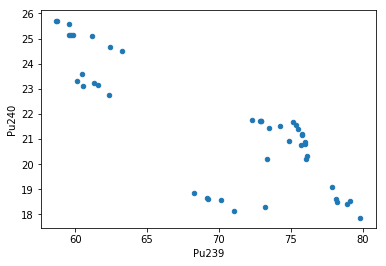

In [3]:
# A:
X = df[['Pu239', 'Pu240']]
X.plot(kind='scatter', x='Pu239', y='Pu240')

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [4]:
# A:
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [5]:
# A: 
df['cluster'] = km.labels_

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

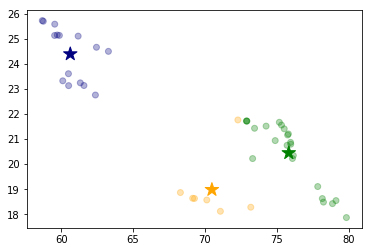

In [6]:
# A:
def plot_clusters(df):
    color_dict = {0: 'navy', 1: 'green', 2: 'orange'}

    centroids = df.groupby('cluster').mean()

    df['cluster_color'] = df['cluster'].map(color_dict)
    centroids['cluster_color'] = centroids.index.map(color_dict)

    plt.scatter(df['Pu239'], df['Pu240'], color=df['cluster_color'], alpha=0.3)
    plt.scatter(centroids['Pu239'], centroids['Pu240'], color=centroids['cluster_color'], marker='*', s=200)
    
plot_clusters(df)

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [10]:
# A:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters=3)
km.fit(X_sc)

df['cluster'] = km.labels_

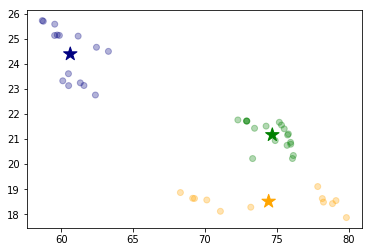

In [11]:
plot_clusters(df)

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [13]:
# A: 
silhouette_score(X_sc, km.labels_)

0.6332174776862322